# Pymaceuticals Inc.

### Analysis

A. Statistics Table
    Ramicane and Capomulin appear to be the most effective treatments, while Ketapril and Naftisol are the least effective. Tumor volume fluctuated the most under Ketapril, indicating that Ketapril had a significant impact on the tumor but is also the riskiest choice. In contrast, Ramicane had a slower, more stable effect, though it may still not be the best option.
Key Observations:
    Lowest Mean and Median Tumor Volume:
        Mean: Ramicane (40.21) and Capomulin (40.67)
        Median: Ramicane (40.67) and Capomulin (41.55)
    Highest Mean and Median Tumor Volume:
        Mean: Ketapril (55.23) and Naftisol (54.33)
        Median: Ketapril (53.70) and Naftisol (52.50)
    Highest Volume Fluctuation:
        Variance: Ketapril (68.55)
        Standard Deviation: Ketapril (8.28)
    Lowest Volume Fluctuation:
        Variance: Ramicane (23.49)
    Standard Deviation: Ramicane (4.85)
Recommendations:
    Consider Ramicane and Capomulin as potential treatments.
    Investigate Ketapril to identify factors contributing to its high fluctuation.

B. Box Plot: Comparing Capomulin and Ramicane
    Ramicane is the most effective treatment compared to Capomulin and others.
Key Observations:
    The final tumor volume results for Ramicane range between 22 and 45, with a median of 35.
    Infubinol, although seemingly the least effective with results around 72, includes an outlier with a tumor volume of approximately 35.
Recommendations:
    Administer Ramicane as prescribed.
    Analyze the outlier in the Infubinol data to determine whether other factors positively influenced the mouse’s response to treatment. This will provide insights into optimizing treatments or reveal if the result was due to human error.

C. Capomulin Treatment of Mouse l509
    This graph provides deeper insight into the effectiveness of the medication and the tumor’s response. It is clear that the medication reduced the tumor size over a 45-day period, from 45 mm³ to 41.5 mm³, resulting in a total decrease of 3.5 mm³. However, this reduction was not immediate, and the tumor showed some resistance during the treatment period.
    Based on the data, I recommend gradually increasing the treatment dosage after 40 days to enhance its effectiveness.
Key Observations:
    Initial Response (0–20 days):
        The tumor size increased from 45 mm³ to 48 mm³ (a 3 mm³ increase) during the first 20 days, suggesting initial resistance to the treatment.
    Sharp Decline (20–25 days):
        After the initial increase, the tumor size dropped sharply from 48 mm³ to 44 mm³ in the next 5 days, indicating the medication began to take effect.
    Temporary Recovery (25–30 days):
        The tumor attempted to recover, increasing slightly from 44 mm³ to 45 mm³ over the next 5 days. However, this increase was smaller than the initial growth, suggesting the tumor was weakened by the medication.
    Significant Reduction (30–35 days):
        The tumor size decreased significantly from 45 mm³ to 40.5 mm³ in the following 5 days, demonstrating the medication’s continued impact.
    Final Resistance (35–45 days):
        In the final 10 days, the tumor showed some resistance, with a slight increase in size. However, it did not exceed its original volume, ending at 41.5 mm³ by day 45.
Recommendations:
    Patients should expect an initial tumor expansion during the first 20 days of treatment.
    After 40 days, doubling the treatment dosage may help counteract the tumor’s resistance and further reduce its size.

D. Scatter Plot Line Chart
    The smaller the mouse, the better the results, as the tumor size tends to be smaller.
Observation:
    The correlation coefficient is 0.84, indicating a strong positive correlation. As weight decreases, the average tumor volume tends to decrease as well, and the relationship between them is fairly strong.
Recommendations:
    I recommend maintaining a healthy weight to improve treatment efficiency.

 

In [351]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
CombinedData = pd.merge(study_results, mouse_metadata, how = "left", on="Mouse ID")

# Display the data table for preview
CombinedData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [352]:
# Checking the number of mice.
MiceNumber = CombinedData['Mouse ID'].nunique()
print(f"Number of Mice is: {MiceNumber}")

Number of Mice is: 249


In [353]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
doubleMice = CombinedData.loc[CombinedData.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()

doubleMice

array(['g989'], dtype=object)

In [354]:
# Optional: Get all the data for the duplicate mouse ID.
DuplicatedMice = CombinedData.loc[CombinedData['Mouse ID']== 'g989']
# print("All rows for duplicate Mouse IDs:")
DuplicatedMice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [355]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanData = CombinedData[CombinedData['Mouse ID'].isin(doubleMice)==False]

cleanData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [356]:
# Checking the number of mice in the clean DataFrame.
len(cleanData['Mouse ID'].unique())

248

## Summary Statistics

In [357]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
MeanVolume = cleanData.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
MedianVolume = cleanData.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
VarianceVolume = cleanData.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
SDVolume = cleanData.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEMVolume = cleanData.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
statistics = pd.DataFrame({
"Mean Tumor Volume" : MeanVolume, 
"Median Tumor Volume" : MedianVolume,
"Tumor Volume Variance" : VarianceVolume,
"Tumor Volume Std. Dev." : SDVolume,
"Tumor Volume Std. Err" : SEMVolume,
})
statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [358]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

quickStatistics = cleanData.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','std','var','sem']})

quickStatistics

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

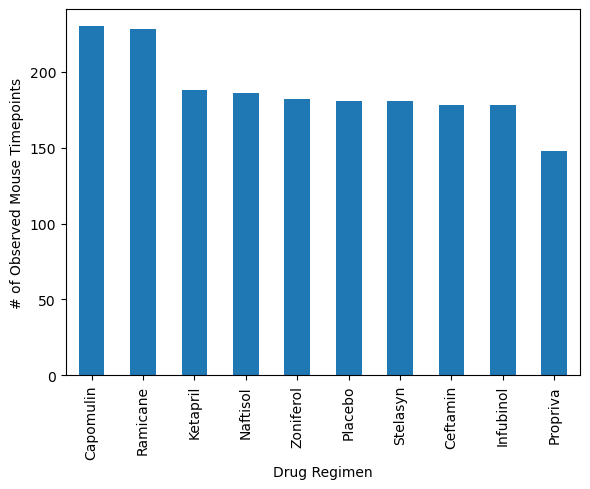

In [359]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group by 'Drug Regimen' and count the number of rows
drugCounts = cleanData.groupby('Drug Regimen').size().sort_values(ascending=False)

# Create a bar plot
drugCounts.plot(kind='bar', color='tab:blue', figsize=(6, 5))

# Set the title and labels

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


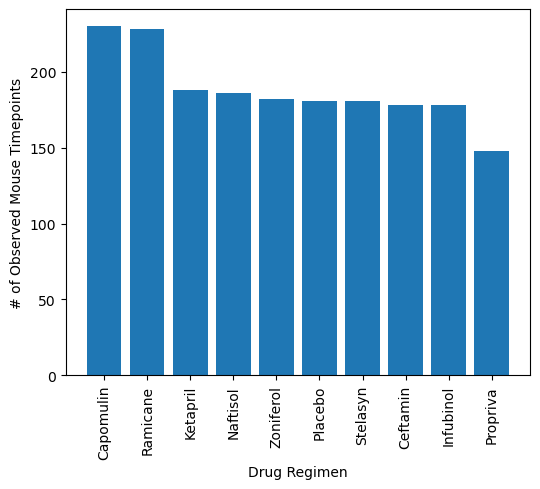

In [360]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group by 'Drug Regimen' and count the number of rows
regimen_counts = cleanData.groupby('Drug Regimen').size().sort_values(ascending = False)

# Create the bar plot
plt.figure(figsize=(5.5, 5))
plt.bar(regimen_counts.index, regimen_counts.values, color='tab:blue')

# Customize the plot
plt.xlabel('Drug Regimen', fontsize=10)
plt.ylabel('# of Observed Mouse Timepoints', fontsize=10)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

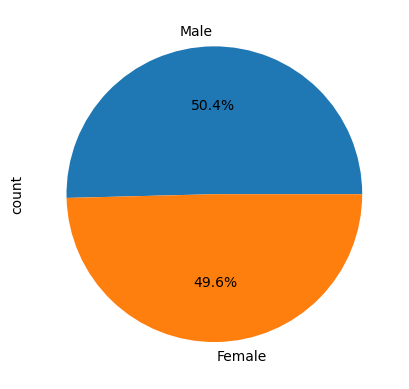

In [361]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
miceGender = cleanData.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()
# Make the pie chart
counts = miceGender.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()


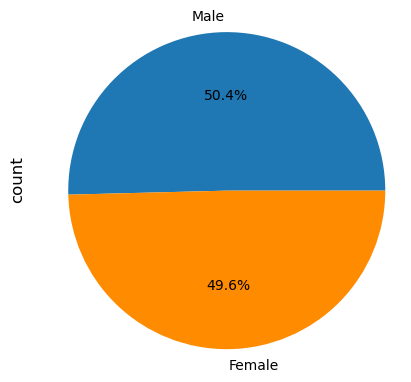

In [362]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
miceGender = cleanData.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()

# Get the counts of each gender
counts = miceGender["Sex"].value_counts()

# Create the pie chart using pyplot
plt.figure(figsize=(4.5, 4.5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=0, colors=['tab:blue', 'darkorange'])
plt.title("count", x= -0.1, y= 0.45 , rotation=90)
plt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [363]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Filtering for specific treatment regimens
selectedTreatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filteredData = cleanData[cleanData["Drug Regimen"].isin(selectedTreatments)]

# Getting the last (greatest) timepoint for each mouse
lastTimepoint = filteredData.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merging with the original DataFrame to get the tumor volume at the last timepoint
finalTumorVolume = pd.merge(lastTimepoint, cleanData, on=["Mouse ID", "Timepoint"], how="left")

# Displaying the final dataset
finalTumorVolume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [364]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = finalTumorVolume.loc[finalTumorVolume["Drug Regimen"] == drug, 'Tumor Volume (mm3)']

    # add subset
    tumor_vol_list.append(final_tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [365]:

# Put treatments into a list for for loop (and later for plot labels)
selectedTreatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
TumorVolumeData = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for Treatment in selectedTreatment:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = finalTumorVolume.loc[finalTumorVolume['Drug Regimen'] == Treatment, 'Tumor Volume (mm3)']

    # add subset to the list 
    TumorVolumeData.append(finalTumorVolume)

    # Calculate the IQR (Interquartile Range)
    quartiles = subset.quantile([.25, .5, .75])
    lowerQ = quartiles[0.25]
    upperQ = quartiles[0.75]
    iqr = upperQ - lowerQ

    # Determine outliers using upper and lower bounds
    lowerBound = lowerQ - (1.5 * iqr)
    upperBound = upperQ + (1.5 * iqr)

    # Identify potential outliers
    outliers = subset[(subset < lowerBound) | (subset > upperBound)]

    # Print the results
    print(f"{Treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


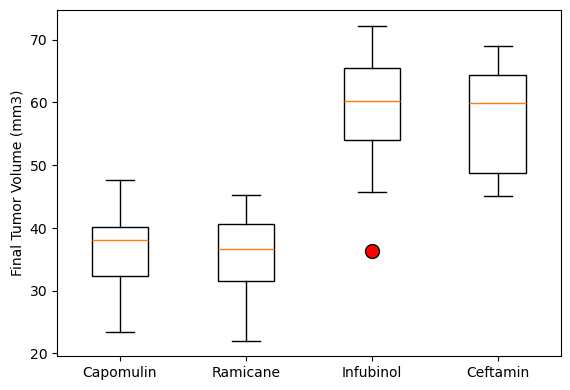

In [366]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(6.5, 4.5))  # Set the figure size
plt.boxplot(tumor_vol_list, tick_labels=treatment_list, patch_artist=True, 
            boxprops=dict(facecolor="white"), widths=0.45, 
            flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=10))  # Fixed flierprops

# Add labels

plt.ylabel("Final Tumor Volume (mm3)", fontsize=10)  # Label the y-axis

# Show the plot
plt.show()

## Line and Scatter Plots

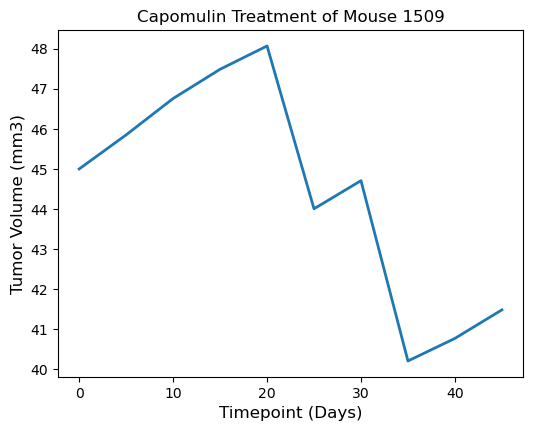

In [367]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = cleanData[cleanData['Mouse ID'] == 'l509']

# Create the line plot
plt.figure(figsize=(6, 4.5))
plt.plot(mouse_id['Timepoint'], mouse_id['Tumor Volume (mm3)'], color='#1f77b4', linestyle='-', linewidth=2)

# Add labels and title
plt.title('Capomulin Treatment of Mouse 1509', fontsize=12)
plt.xlabel('Timepoint (Days)', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

# Show the plot
plt.show()

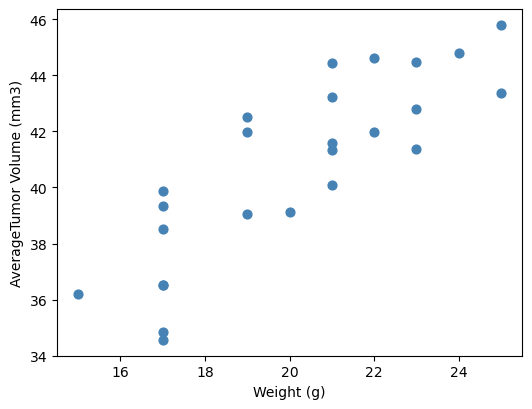

In [368]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Select the Capumolin Data
Capumulin = cleanData.loc[cleanData['Drug Regimen']=="Capomulin"]

#Finding Average Weight 
CapomulinAve = Capumulin[['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']] \
    .groupby('Mouse ID').mean() \
    .sort_values('Mouse ID') \
    .reset_index()

plt.figure(figsize=(6, 4.5))
plt.scatter(CapomulinAve['Weight (g)'], CapomulinAve['Tumor Volume (mm3)'], color='steelblue', s=40)

# Add labels and title

plt.xlabel('Weight (g)', fontsize=10)
plt.ylabel('AverageTumor Volume (mm3)', fontsize=10)


# Show the plot
plt.show()



## Correlation and Regression

In [369]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


Correlation Coefficient: 0.84
Linear Regression Equation: y = 0.95x + 21.55
R-squared: 0.71


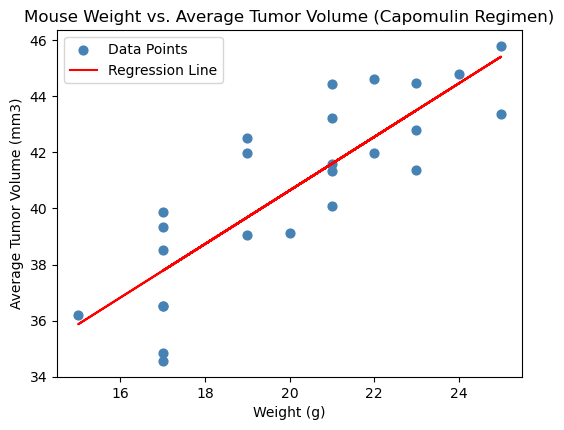

In [370]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress
import numpy as np

# Data from your DataFrame
weights = CapomulinAve['Weight (g)']
tumor_volumes = CapomulinAve['Tumor Volume (mm3)']

# Step 1: Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(weights, tumor_volumes)
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

# Step 2: Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(weights, tumor_volumes)
print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")

# Step 3: Plot the scatter plot with the regression line
plt.figure(figsize=(6, 4.5))
plt.scatter(weights, tumor_volumes, color='steelblue', s=40, label='Data Points')

# Add the regression line
regression_line = slope * weights + intercept
plt.plot(weights, regression_line, color='red', label='Regression Line')

# Add labels, title, and legend
plt.xlabel('Weight (g)', fontsize=10)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=10)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)', fontsize=12)
plt.legend()

# Show the plot
plt.show()